## Esercizio Classificazione 2

In [37]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv'

In [38]:
df = pd.read_csv(path)
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [39]:
patterns = {
            r"b'": '',
            r'\d+': '',      # rimuove digits (numeri)
            r'[^\w\s]': '',  # Remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',#remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '      # rimuove tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
        df[column] = df[column].str.strip()
    return df

In [40]:
df_cleaned = clean_column(df, 'text', patterns)

In [42]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [43]:
df_cleaned['text'] = df_cleaned['text'].fillna(' ')

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_features=2000, min_df=0.01, max_df=0.9)
tfidfconverter = TfidfTransformer()

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.sentiment, 
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [89]:
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train = tfidfconverter.fit_transform(X_train_vect).toarray()           # applico la trasformazione TF-IDF
print(X_train.shape, y_train.shape)

(20610, 140) (20610,)


In [90]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test = tfidfconverter.transform(X_test_vect).toarray()
print(X_test.shape, y_test.shape)

(6871, 140) (6871,)


In [91]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
test_data_accuracy = accuracy_score(y_test,y_pred)

print(f'Accuracy score of the test data : {test_data_accuracy}\n')
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy score of the test data : 0.5817202736137389

              precision    recall  f1-score   support

    negative       0.70      0.27      0.39      1961
     neutral       0.51      0.86      0.64      2818
    positive       0.76      0.51      0.61      2092

    accuracy                           0.58      6871
   macro avg       0.66      0.54      0.55      6871
weighted avg       0.64      0.58      0.56      6871

0.5454135500662777


In [92]:
y_train

437      negative
22517     neutral
7611     positive
18363    negative
24578     neutral
           ...   
13815    positive
14180     neutral
14425    positive
6543     positive
213      positive
Name: sentiment, Length: 20610, dtype: object

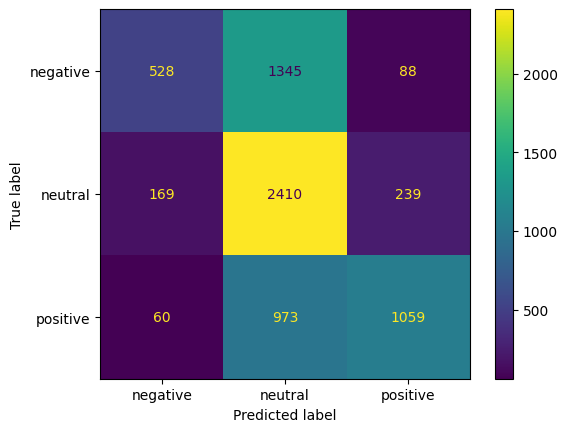

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

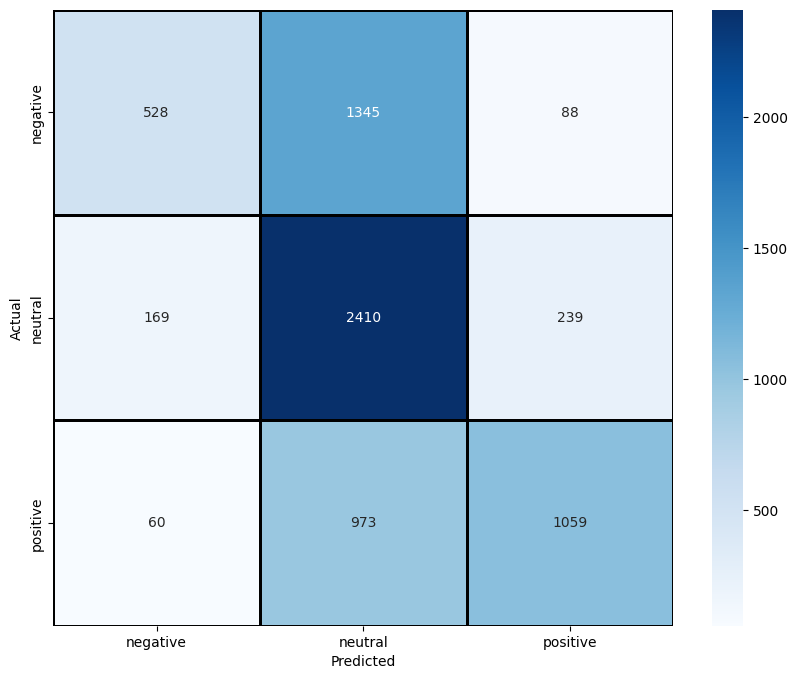

In [94]:

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [2]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy score of the test data : {test_data_accuracy}\n')
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

NameError: name 'X_train' is not defined

Text(95.72222222222221, 0.5, 'Actual')

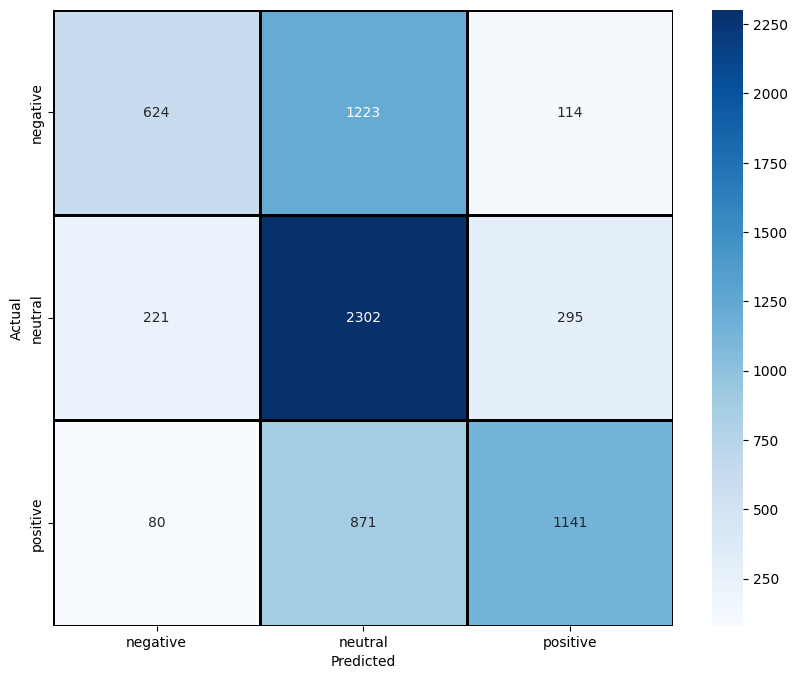

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
import joblib

joblib.dump(classifier, "SGD_sentiment.pkl")

NameError: name 'classifier' is not defined